In [1]:
from pylab import *
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif"
    })

plt.rc('text.latex', preamble=r'\usepackage[T1,T2A]{fontenc}\usepackage[utf8]{inputenc}\usepackage{cmsrb}\usepackage{amsmath}\usepackage[Symbolsmallscale]{upgreek}\usepackage{icomma}')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)


# Decimalni zarez
import locale
locale.setlocale(locale.LC_NUMERIC, "sr_RS.utf8")
plt.rcParams['axes.formatter.use_locale'] = True


def u(t):
    return (t > 0) * 1.0

In [2]:
def generate_canvas(w = 1.6, h =  1.6 / 1.618):
    fig = figure (figsize = (w, h))
    xlim([-2,2])
    ylim([-2,2])
    minorticks_on()
    grid(visible=True, which='major', color='0.45', linestyle='-')
    grid(visible=True, which='minor', color='0.75', linestyle='--')

    return fig

def plot_dirac(x, A, lw = 1.5, c = 'k'):
    arrow(x, 0, 0, A, shape="full", color=c,linewidth=lw, head_width=0.2, head_length=0.3, length_includes_head=True, zorder=10)
    

In [3]:
def multiple_formatter(denominator=3, number=np.pi, latex=r'\uppi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\dfrac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$-\dfrac{%s}{%s}$'%(latex,den)
            elif num>1:
                return r'$\dfrac{%s%s}{%s}$'%(num,latex,den)
            elif num<-1:
                return r'$-\dfrac{%s%s}{%s}$'%(abs(num),latex,den)
                
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex=r'\uppi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

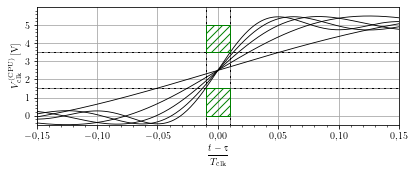

In [196]:
width = 165 / 25.4 # sirina
height = width / 3 

fig = figure (figsize = (width, height))
ax = fig.gca()
xlim([-0.15,0.15])
ylim([-0.5, 6])
minorticks_on()
grid(visible=True, which='major', color='0.65', linestyle='-')
#grid(visible=True, which='minor', color='0.75', linestyle='--')
yticks([0,1,2,3,4,5]) 

dt_half = 2.5e-9 / 250e-9

t = linspace(-0.5, 0.5, 1000)

y = t * 0 + 2.5
yh = t * 0 + 3.5
yl = t * 0 + 1.5

plt.plot(t, yh, 'k', ls = (0, (3, 1, 1, 1)), lw = 1 )
plt.plot(t, yl, 'k', ls = (0, (3, 1, 1, 1)), lw = 1 )
plt.plot([dt_half, dt_half], [-10, 10], 'k', ls = (0, (3, 1, 1, 1)), lw = 1 )
plt.plot([-dt_half, -dt_half], [-10, 10], 'k', ls = (0, (3, 1, 1, 1)), lw = 1 )

for k in [1,3,5,7,9]:
    y +=  5 * sinc(k/2) * cos(k*2*pi*t - k*pi/2)
    if k == 1: plot(t, y, 'k', ls = '-', lw=0.85)
    if k == 3: plot(t, y, 'k', ls = '-', lw=0.85)
    if k == 5: plot(t, y, 'k', ls = '-', lw=0.85)
    if k == 7: plot(t, y, 'k', ls = '-', lw=0.85)
    if k == 9: plot(t, y, 'k', ls = '-', lw=0.85)
    
p = matplotlib.patches.Rectangle((-dt_half,1.5), dt_half*2, -1.5, color='green', linewidth=1, fill=None, hatch='///', zorder=100)
#p = matplotlib.patches.Rectangle((+dt_half,1.5), 1*dt_half, +2, color='red', linewidth=.75, fill=None, hatch='///', zorder=100)
ax.add_patch(p)

p = matplotlib.patches.Rectangle((-dt_half,3.5), dt_half*2, +1.5, color='green', linewidth=1, fill=None, hatch='///', zorder=100)
#p = matplotlib.patches.Rectangle((-dt_half,1.5), -1*dt_half, +2, color='red', linewidth=.75, fill=None, hatch='///', zorder=100)
ax.add_patch(p)

#p = matplotlib.patches.Rectangle((0.0,0), 1, 1, color='red', linewidth=1, fill=None, hatch='///')
#ax.add_patch(p)


    
ylabel(r"$V_{\rm clk}^{\rm (CPU)}\rm\,[V]$" )
xlabel(r"$\dfrac{t-\uptau}{T_{\rm clk}}$")

#plt.show()

plt.savefig("proc_plot.pdf", bbox_inches='tight' )
# Slika se dodatno edituje u Inkscapeu

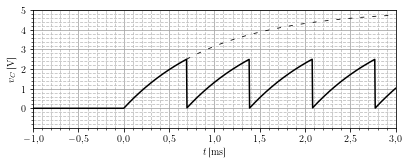

In [34]:
width = 165 / 25.4 # sirina
height = width / 3 

fig = figure (figsize = (width, height))
ax = fig.gca()
minorticks_on()
grid(visible=True, which='major', color='0.65', linestyle='-')
grid(visible=True, which='minor', color='0.75', linestyle='--')

t = np.linspace(-2e-3, 3e-3,1000)

w = 2*pi*50

Vm = 5
tau = 1e3 * 1e-6
m = 0.5
T = tau*log(1/(1-m))
t_T = np.linspace(T, 3e-3,1000)

def f(t):
    return Vm*(1-exp(-t/tau)) * (t > 0) * (t < T) 

def fcont(t):
    return Vm*(1-exp(-t/tau)) * (t>0)

vI = 0
for j in range(0, 5):
    vI += f(t - j*T)

plt.plot(t / 1e-3, vI, 'k')
plt.yticks([0,1,2,3,4,5]) 
plt.plot(t_T / 1e-3, fcont(t_T), 'k', ls = (0, (5, 10)), lw = 0.8)
plt.xlabel(r'$t\,$[ms]')
plt.ylabel(r'$v_{C}\,$[V]')
plt.ylim([-1, 5])
plt.xlim([-1, 3])
plt.savefig("exp_osc_plot.pdf", bbox_inches="tight")

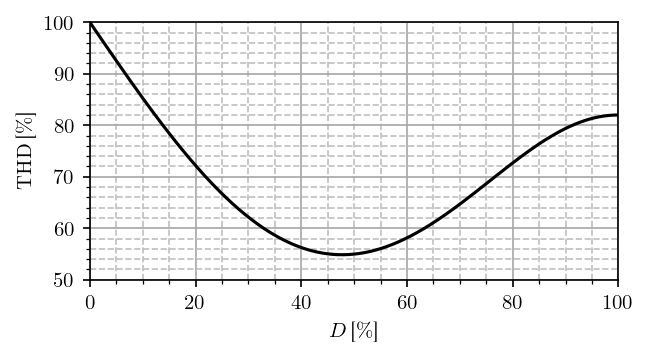

In [34]:
width = 0.7*165 / 25.4 # sirina
height = width/2 

fig = figure (figsize = (width, height), dpi=150)
ax = fig.gca()
minorticks_on()
grid(visible=True, which='major', color='0.65', linestyle='-')
grid(visible=True, which='minor', color='0.75', linestyle='--')

t = np.linspace(-2e-3, 3e-3,1000)

w = 2*pi*50

Vm = 5
tau = 1e3 * 1e-6
m = 0.5
T = tau*log(1/(1-m))
D = np.linspace(0.001, 1,1000)

def f(D):
    return 8 * ( ( (2*sin(pi*D)*sin(2*pi*D) + cos(pi*D)*cos(2*pi*D) - 1  )/3 )**2  + \
                 ( (2*sin(pi*D)*cos(2*pi*D) - cos(pi*D)*sin(2*pi*D)      )/3 )**2 )  \
                 /(pi * ( sin(2*pi*D) - 2*pi*D )) + 1
vI = 0
for j in range(0, 5):
    vI += f(t - j*T)

plt.plot(100*D, 100*f(D), 'k', lw = 1.5)
plt.xlabel(r'$D\,$[\%]')
plt.ylabel(r'${\rm THD}\,$[\%]')
plt.ylim([50, 100])
plt.xlim([0, 100])

plt.savefig("THD_plot.pdf", bbox_inches="tight")

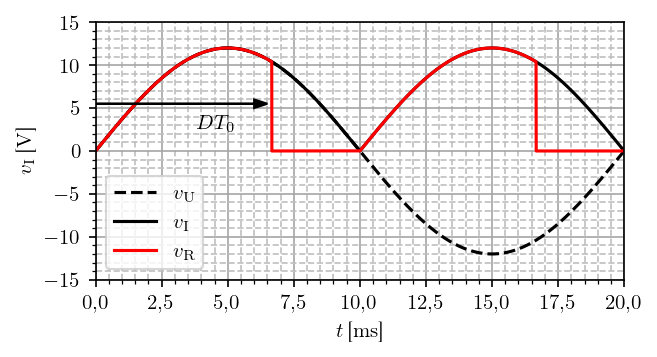

In [101]:
def generate_canvas(w = 1.6, a = 1.618):
    fig = figure (figsize = (a*w, w), dpi = 200)
    xlim([-2,2])
    ylim([-2,2])
    minorticks_on()
    grid(b=True, which='major', color='0.45', linestyle='-')
    grid(b=True, which='minor', color='0.75', linestyle='--')
    return fig

width = 0.7*165 / 25.4 # sirina
height = width/2 

fig = figure (figsize = (width, height), dpi=150)
ax = fig.gca()
minorticks_on()
grid(visible=True, which='major', color='0.65', linestyle='-')
grid(visible=True, which='minor', color='0.75', linestyle='--')

#generate_canvas(w = 1.4, a = 2)

t_ax = np.linspace(0, 20e-3,10000)
w0 = 100*pi
xlim([-0,20])
ylim([-15, +15])
plt.plot(t_ax/1e-3, 12* sin(w0*t_ax) * (t_ax >= 0.0), 'k--', lw = 1.5   )
plt.plot(t_ax/1e-3, 12* abs(sin(w0*t_ax)) * (t_ax >= 0.0), 'k', lw = 1.5   )
plt.plot(t_ax/1e-3, 12* abs(sin(w0*t_ax) * (( w0*t_ax < 2*pi/3)*1.0+1.0*(w0*t_ax > pi ) \
                                         * ( w0*t_ax < 5*pi/3)*1.0+1.0*(w0*t_ax > 2*pi )) ) * (t_ax >= 0.0), 'r', lw = 1.5)

W, H = 6, 0

arrow_style = {
    "head_width": 1,
    "head_length": 0.5,
    "shape": "full",
    "zorder" : 1000,
    "color":"k"
}

plt.arrow(x=0, y=5.5, dx=W, dy=H, **arrow_style)
plt.annotate(r'$DT_0$',
             xy=(W/2, 5),
             xytext=(10, -10),
             textcoords='offset points')

plt.xlabel(r'$t\,$[ms]')
plt.ylabel(r'$v_{\rm I}\,$[V]')
plt.legend([ r"$v_{\rm U}$" , r"$v_{\rm I}$", r"$v_{\rm R}$" ])
plt.savefig("THD_vi_vr.pdf", bbox_inches="tight")

In [78]:
W

6.666666666666666